# EEG - GAN

## Initialization

#### Import Libraries

In [1]:
import os, requests
from matplotlib import rcParams
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd

#### Dataset

In [2]:
fname = 'motor_imagery.npz'
url = "https://osf.io/ksqv8/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

#### Figure Setup

In [3]:
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
class process():
    def __init__():
        return

    def preprocess(data):
        V = data['V'].astype('float32')
        b, a = signal.butter(3, [50], btype = 'high', fs=1000)
        V = signal.filtfilt(b,a,V,0)
        V = np.abs(V)**2
        b, a = signal.butter(3, [10], btype = 'low', fs=1000)
        V = signal.filtfilt(b,a,V,0)
        V = V/V.mean(0)
        return V

class plots():
    def __init__():
        return

    def singlechannel1(data, channel, trange):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def singlechannel2(data, data2, channel, trange):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.plot(trange, data2[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def all_channels1(data, trange):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

    def all_channels2(data, data2, trange):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.plot(trange, data2[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

## Manipulating the Dataset

In [5]:
AllData = np.load(fname, allow_pickle= True)['dat']

AllData[0][0].keys()

dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])

In [6]:
# Checking srate for every subject:
for i in range(7):
    for j in range(2):
        print(AllData[i][j]['srate'])

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


This is how we access subject 0 and experiment 0 (real movement)

In [7]:
RealPatientZero = AllData[0][0]

We store all the real trials in an array called RealPatients which holds 7 different participants real trials.

In [8]:
RealPatients = []

for i in range(7):
    RealPatients.append(process.preprocess(AllData[i][0]))

realDataV = []

for i in range(7):
    realDataV.append(RealPatients[i])

This is how we access subject 0 and experiment 1 (imagined movement)

In [9]:
ImaginaryPatientZero = AllData[0][1]

We also create an array for the imaginary participants called ImaginaryPatients

In [10]:
ImaginaryPatients = []

for i in range(7):
    ImaginaryPatients.append(AllData[i][0])

ImaginaryDataV = []

for i in range(7):
    ImaginaryDataV.append(ImaginaryPatients[i]['V'])

len(ImaginaryDataV), ImaginaryDataV[0].shape

(7, (376400, 46))

In [11]:
iDATA = []
rDATA = []

In [12]:
alldat = np.load(fname, allow_pickle=True)['dat']

for trial_i in range(7):
    real = alldat[trial_i][0]
    imagine = alldat[trial_i][1]

    processed_real = process.preprocess(real)
    nt_pr, nchan_pr = processed_real.shape
    nstim_r = len(real['t_on'])

    trange = np.arange(0, 2000)
    ts = real['t_on'][:,np.newaxis] + trange

    V_epochs_pr = np.reshape(processed_real[ts, :], (nstim_r, 2000, nchan_pr))

    V_hand_real = (V_epochs_pr[real['stim_id']==12])  #Change this to 11 to get tongue data and 12 to get hand data

    ##### This is the voltage data and you could change the trial from here
    hand_real_data = V_hand_real.mean(0)

    processed_imagine = process.preprocess(imagine)
    nt_pi, nchan_pi = processed_imagine.shape
    nstim_i = len(imagine['t_on'])

    trange = np.arange(0, 2000)
    ts = imagine['t_on'][:,np.newaxis] + trange

    V_epochs_pi = np.reshape(processed_imagine[ts, :], (nstim_i, 2000, nchan_pi))

    V_hand_imagine = (V_epochs_pi[imagine['stim_id']==12])

    
    iDATA.append(V_hand_imagine)
    rDATA.append(V_hand_real)
    

In [13]:
len(rDATA), len(rDATA[0]),len(rDATA[0][0]),len(rDATA[0][0][0])

(7, 30, 2000, 46)

In [14]:
final_real_data = []
final_imagine_data = []

In [15]:
for i in range(7):
    final_real_data.append(rDATA[i])
    final_imagine_data.append(iDATA[i])

In [16]:
final_real_data[0][0][0]

array([1.03239824, 2.08178703, 0.79472739, 1.10901149, 1.89969475,
       0.90590056, 0.80710954, 0.56184027, 0.99856583, 1.23112589,
       0.86497863, 1.09916753, 0.54918217, 0.67019065, 0.68971726,
       0.80735245, 0.95976788, 1.29400689, 0.62806574, 0.57623688,
       2.14236454, 0.81784859, 0.755451  , 1.00035404, 0.56814874,
       0.9553773 , 0.88511778, 1.29314685, 0.59411733, 0.75333447,
       0.81986413, 1.22171091, 1.25822405, 0.81730836, 0.7042236 ,
       0.68111666, 0.88612524, 2.16607492, 2.28988278, 1.99909424,
       0.57125939, 0.69193822, 1.02849613, 0.93985631, 1.5605287 ,
       0.95993965])

## Preprocessing

NameError: name 'V_tongue' is not defined

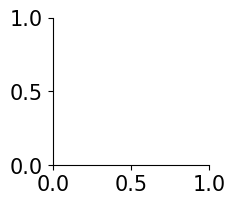

In [17]:
# let's find the electrodes that distinguish tongue from hand movements
# note the behaviors happen some time after the visual cue

plt.figure(figsize=(20, 10))
for j in range(46):
  ax = plt.subplot(5, 10, j+1)
  plt.plot(trange, V_tongue[:, j])
  plt.plot(trange, V_hand[:, j])
  plt.title('ch%d'%j)
  plt.xticks([0, 1000, 2000])
  plt.ylim([0, 4])
plt.show()

In [ ]:
isort = np.argsort(data1['stim_id'])

V_epochs[isort, :, 20].shape

In [ ]:
# let's look at all the trials for electrode 20 that has a good response to hand movements
# we will sort trials by stimulus id
plt.subplot(1, 3, 1)
isort = np.argsort(data1['stim_id'])
plt.imshow(V_epochs[isort, :, 20].astype('float32'),
           aspect='auto',
           vmax=7, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()

In [ ]:
# Electrode 42 seems to respond to tongue movements
isort = np.argsort(data1['stim_id'])
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[isort, :, 42].astype('float32'),
           aspect='auto',
           vmax=7, vmin=0,
           cmap='magma')
plt.colorbar()
plt.show()

## OLD METHOD

In [31]:
alldat = np.load(fname, allow_pickle=True)['dat']

real = alldat[0][0]
imagine = alldat[0][1]

In [37]:
processed_real = process.preprocess(real)
nt_pr, nchan_pr = processed_real.shape
nstim_r = len(real['t_on'])

trange = np.arange(0, 2000)
ts = real['t_on'][:,np.newaxis] + trange

V_epochs_pr = np.reshape(processed_real[ts, :], (nstim_r, 2000, nchan_pr))

V_hand_real = (V_epochs_pr[real['stim_id']==12])  #Change this to 11 to get tongue data and 12 to get hand data

##### This is the voltage data and you could change the trial from here
hand_real_data = V_hand_real.mean(0)

processed_imagine = process.preprocess(imagine)
nt_pi, nchan_pi = processed_imagine.shape
nstim_i = len(imagine['t_on'])

trange = np.arange(0, 2000)
ts = imagine['t_on'][:,np.newaxis] + trange

V_epochs_pi = np.reshape(processed_imagine[ts, :], (nstim_i, 2000, nchan_pi))

V_hand_imagine = (V_epochs_pi[imagine['stim_id']==12])

##### This is the voltage data and you could change the trial from here
hand_imagine_data = V_hand_imagine.mean(0)
hand_real_data = V_hand_real.mean(0)

### Variable

In [38]:
processed_real, nt_pr, nchan_pr, nstim_r, trange, ts, V_epochs_pr, V_hand_real, hand_real_data

(array([[ 0.47885706, -1.32819323,  0.92880269, ...,  0.15265989,
          2.16625328,  3.09489014],
        [ 0.51597095, -1.16681033,  1.20569616, ...,  0.30020882,
          2.46298703,  3.51258437],
        [ 0.55365299, -1.00826717,  1.48775263, ...,  0.44943319,
          2.76920687,  3.94293351],
        ...,
        [ 0.82191123,  0.38873177,  1.18885365, ...,  0.68158886,
          0.43002565,  0.588227  ],
        [ 0.82102839,  0.38814852,  1.18862379, ...,  0.68031834,
          0.42931421,  0.58784019],
        [ 0.82027876,  0.38765728,  1.18838001, ...,  0.67926009,
          0.42872031,  0.58749721]]),
 376400,
 46,
 60,
 array([   0,    1,    2, ..., 1997, 1998, 1999]),
 array([[ 10160,  10161,  10162, ...,  12157,  12158,  12159],
        [ 16160,  16161,  16162, ...,  18157,  18158,  18159],
        [ 22160,  22161,  22162, ...,  24157,  24158,  24159],
        ...,
        [354640, 354641, 354642, ..., 356637, 356638, 356639],
        [360640, 360641, 360642, ..., 

### Close

In [ ]:
V_hand_imagine.shape

In [ ]:
plots.all_channels2(hand_real_data, hand_imagine_data, trange)
plots.singlechannel1(V_hand_imagine[0], 13, trange)
plots.singlechannel2(hand_real_data, hand_imagine_data, 1, trange)

In [ ]:
plots.all_channels1(hand_real_data, trange)

## GAN

In [ ]:
import torch
import torch.nn as nn
from torch.utils import data

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True


np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [ ]:
#The dataset
specify_channel = 20

cnn_inputs_real = []
for i in range(30):
    abc = V_hand_real[i]
    cnn_inputs_real.append(abc[:, specify_channel])
#cnn_inputs_real is for real data. 1 is the label for real
cnn_inputs_real = np.array(cnn_inputs_real)


labels_real = np.ones((30))
labels_real = labels_real.reshape(30,1)


cnn_inputs_imagine = []
for i in range(30):
    abc = V_hand_imagine[i]
    cnn_inputs_imagine.append(abc[:, specify_channel])
#cnn_inputs_imagine is for imaginary data. 0 is the label for imaginary
cnn_inputs_imagine = np.array(cnn_inputs_imagine)

labels_imagine = np.zeros((30))
labels_imagine = labels_imagine.reshape(30,1) 

In [ ]:
trainX = np.append(cnn_inputs_real[0:20], cnn_inputs_imagine[0:20], axis=0)
trainy = np.append(labels_real[0:20], labels_imagine[0:20], axis=0)

trainX = trainX.reshape([40,2000,1])

testX = np.append(cnn_inputs_real[20:30], cnn_inputs_imagine[20:30], axis=0)
testy = np.append(labels_real[20:30], labels_imagine[20:30], axis=0)
testX = testX.reshape([20,2000,1])

In [ ]:
class EEGDataset(data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [ ]:
dataset = EEGDataset()


# Delete later

In [ ]:
alldat = np.load(fname, allow_pickle=True)['dat']

In [ ]:
dat1 = alldat[0][0]

# V is the voltage data
V = dat1['V'].astype('float32')

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

In [ ]:
nt, nchan = V.shape
nstim = len(dat1['t_on'])

trange = np.arange(0, 2000)
ts = dat1['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))
print(V_epochs.shape)

V_tongue = (V_epochs[dat1['stim_id'] == 11]).mean(0)
V_hand = (V_epochs[dat1['stim_id'] == 12]).mean(0)
     

In [ ]:
dat1

In [ ]:
data_items = dat1.items()
data1 = list(data_items)
data1

In [ ]:
data1 = pd.DataFrame.from_dict(data1,orient='columns')
print(data1)

In [ ]:


df1 = pd.DataFrame(columns=data1[0])
print(data1[1][5].shape)

In [ ]:
df1['t_off']=(np.ndarray.tolist(data1[1][0]))
df1['stim_id']=(np.ndarray.tolist(data1[1][1]))
df1['t_on']=(np.ndarray.tolist(data1[1][2]))
df1['V'] = (np.ndarray.tolist(V_epochs))
df1['scale_uv'] = 1000
df1 = df1[['t_on','t_off','stim_id','V']]

options = [12]

df1 = df1[df1['stim_id'].isin(options)]

df1

In [ ]:

df1['V'][0]=[list(x) for x in zip(*df1['V'][0])]


for i in df1.index:
  if i != 0:
    df1['V'][i]=[list(x) for x in zip(*df1['V'][i])]

df1

## Dataset

In [18]:
fname = 'motor_imagery.npz'
url = "https://osf.io/ksqv8/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [19]:
class process():
    def __init__():
        """
        This class is used to preprocess the data.
        The input is a dict with a key 'V' containing the voltage data.
        """
        return

    def preprocess(data):
        V = data['V'].astype('float32')
        b, a = signal.butter(3, [50], btype='high', fs=1000)
        V = signal.filtfilt(b, a, V, 0)
        V = np.abs(V)**2
        b, a = signal.butter(3, [10], btype='low', fs=1000)
        V = signal.filtfilt(b, a, V, 0)
        V = V/V.mean(0)
        return V

class plots():
    def __init__():
        """
        For plotting the dataset
        """
        return

    def singlechannel1(data, channel, trange):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def singlechannel2(data, data2, channel, trange):
        plt.figure(figsize=(20,10))
        plt.plot(trange, data[:,channel])
        plt.plot(trange, data2[:,channel])
        plt.title('ch%d'%channel)
        plt.xticks([0, 1000, 2000])
        plt.ylim([0, 4])

    def all_channels1(data, trange):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

    def all_channels2(data, data2, trange):
        plt.figure(figsize=(20,10))
        for j in range(46):
            ax = plt.subplot(5,10,j+1)
            plt.plot(trange, data[:,j])
            plt.plot(trange, data2[:,j])
            plt.title('ch%d'%j)
            plt.xticks([0, 1000, 2000])
            plt.ylim([0, 4])

In [20]:
DataLoad = np.load(fname, allow_pickle=True)['dat']
type(DataLoad), len(DataLoad), DataLoad.shape, DataLoad[0][0].keys()

(numpy.ndarray,
 7,
 (7, 2),
 dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area']))

In [24]:
for i in range(1):
    print(DataLoad[i][0]['V'].shape)
    print(DataLoad[i][0]['V'])

(376400, 46)


In [26]:
x = process.preprocess(DataLoad[i][0])

In [27]:
for i in range(1):
    print(x)

[[ 0.47885706 -1.32819323  0.92880269 ...  0.15265989  2.16625328
   3.09489014]
 [ 0.51597095 -1.16681033  1.20569616 ...  0.30020882  2.46298703
   3.51258437]
 [ 0.55365299 -1.00826717  1.48775263 ...  0.44943319  2.76920687
   3.94293351]
 ...
 [ 0.82191123  0.38873177  1.18885365 ...  0.68158886  0.43002565
   0.588227  ]
 [ 0.82102839  0.38814852  1.18862379 ...  0.68031834  0.42931421
   0.58784019]
 [ 0.82027876  0.38765728  1.18838001 ...  0.67926009  0.42872031
   0.58749721]]


In [28]:
x.shape

(376400, 46)

In [29]:
real = DataLoad[0][0]

In [39]:
processed_real = process.preprocess(real)
nt_pr, nchan_pr = processed_real.shape
nstim_r = len(real['t_on'])

trange = np.arange(0, 2000)
ts = real['t_on'][:,np.newaxis] + trange

V_epochs_pr = np.reshape(processed_real[ts, :], (nstim_r, 2000, nchan_pr))

V_hand_real = (V_epochs_pr[real['stim_id']==12]) 

In [41]:
V_epochs_pr

array([[[1.03239824, 2.08178703, 0.79472739, ..., 0.93985631,
         1.5605287 , 0.95993965],
        [1.03252003, 2.05635799, 0.79412391, ..., 0.93808527,
         1.56011052, 0.97469385],
        [1.03232262, 2.03121664, 0.79408847, ..., 0.93617379,
         1.55926123, 0.98939462],
        ...,
        [0.58633759, 1.33888816, 1.5196949 , ..., 1.11650211,
         1.80673885, 0.79530669],
        [0.58099188, 1.32820479, 1.49424012, ..., 1.11764887,
         1.79386666, 0.79505026],
        [0.57568396, 1.31743287, 1.46867311, ..., 1.119119  ,
         1.77982419, 0.79589185]],

       [[0.91997634, 0.9021236 , 1.04112229, ..., 1.25907677,
         1.03795198, 0.83678798],
        [0.92124544, 0.89603622, 1.04965135, ..., 1.25797712,
         1.04196172, 0.84543885],
        [0.92258212, 0.88973869, 1.0586183 , ..., 1.25595122,
         1.04500122, 0.8540241 ],
        ...,
        [0.35918222, 0.90445972, 1.21099095, ..., 1.63285724,
         1.21504006, 0.67808357],
        [0.3

In [40]:
processed_real, nt_pr, nchan_pr, nstim_r, trange, ts, V_epochs_pr, V_hand_real, hand_real_data

(array([[ 0.47885706, -1.32819323,  0.92880269, ...,  0.15265989,
          2.16625328,  3.09489014],
        [ 0.51597095, -1.16681033,  1.20569616, ...,  0.30020882,
          2.46298703,  3.51258437],
        [ 0.55365299, -1.00826717,  1.48775263, ...,  0.44943319,
          2.76920687,  3.94293351],
        ...,
        [ 0.82191123,  0.38873177,  1.18885365, ...,  0.68158886,
          0.43002565,  0.588227  ],
        [ 0.82102839,  0.38814852,  1.18862379, ...,  0.68031834,
          0.42931421,  0.58784019],
        [ 0.82027876,  0.38765728,  1.18838001, ...,  0.67926009,
          0.42872031,  0.58749721]]),
 376400,
 46,
 60,
 array([   0,    1,    2, ..., 1997, 1998, 1999]),
 array([[ 10160,  10161,  10162, ...,  12157,  12158,  12159],
        [ 16160,  16161,  16162, ...,  18157,  18158,  18159],
        [ 22160,  22161,  22162, ...,  24157,  24158,  24159],
        ...,
        [354320, 354321, 354322, ..., 356317, 356318, 356319],
        [360360, 360361, 360362, ..., 

In [ ]:
realV = {}
imagineV = {}
realSet = {}
imagineSet = {}

desiredKeys = ['t_off', 'stim_id', 't_on', 'V', 'scale_uv', 'locs', 'srate']

for i in range(7):
    print(f"Sample rate of participant (real) {i}: {DataLoad[i][0]['srate']}")
    print(f"Sample rate of participant (imagine) {i}: {DataLoad[i][1]['srate']}")
    
    x = process.preprocess(DataLoad[i][0])
    nt, nchan = x.shape
    nstim = len(DataLoad[i][0]['t_on'])
    trange = np.arange(0, 2000)
    ts = DataLoad[i][0]['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(x[ts, :], (nstim, 2000, nchan))
    print(V_epochs.shape)
    realV[i] = V_epochs
    realSet[i] = {key: DataLoad[i][0][key] for key in desiredKeys}

    y = process.preprocess(DataLoad[i][1])
    nt, nchan = y.shape
    nstim = len(DataLoad[i][1]['t_on'])
    trange = np.arange(0, 2000)
    ts = DataLoad[i][1]['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(y[ts, :], (nstim, 2000, nchan))
    print(V_epochs.shape)
    imagineV[i] = V_epochs
    imagineSet[i] = {key: DataLoad[i][1][key] for key in desiredKeys}
